# Задание 1: изучение Python, NumPy

### Для каждой из задач:

1) Написать на Python + NumPy несколько вариантов кода различной эффективности. Один полностью векторизованный вариант (fast) и один вариант без векторизации (slow).

2) Сравнить в IPython при помощи %timeit скорость работы на нескольких тестовых наборах разного размера (минимум 3).

3) Проанализировать полученные данные о скорости работы разных реализаций.

In [1]:
import numpy as np

## Task 1
Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. Для `X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])`, ответ: `3`

In [15]:
def get_nonzero_diagonal_product(X):
    mul = 1
    min = len(X) if len(X)<len(X[1]) else len(X[1])
    for i in range(min):
        mul *= X[i][i] if X[i][i] != 0 else 1
    return mul

In [16]:
def get_nonzero_diagonal_product_fast(X):
    diag = X.diagonal()
    new = np.delete(diag, np.where(diag == 0))
    return new.prod()

In [19]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) #vertical

assert get_nonzero_diagonal_product(X) == get_nonzero_diagonal_product_fast(X)
print('slow')
%timeit get_nonzero_diagonal_product(X)
print('fast')
%timeit get_nonzero_diagonal_product_fast(X)

X = np.random.random((3,10)) #horizontal
assert get_nonzero_diagonal_product(X) == get_nonzero_diagonal_product_fast(X)
print('slow')
%timeit get_nonzero_diagonal_product(X)
print('fast')
%timeit get_nonzero_diagonal_product_fast(X)

X = np.zeros((10,10)) #zeros only
assert get_nonzero_diagonal_product(X) == get_nonzero_diagonal_product_fast(X)
print('slow')
%timeit get_nonzero_diagonal_product(X)
print('fast')
%timeit get_nonzero_diagonal_product_fast(X)

X = np.ones((100,100))
assert get_nonzero_diagonal_product(X) == get_nonzero_diagonal_product_fast(X)
print('slow')
%timeit get_nonzero_diagonal_product(X)
print('fast')
%timeit get_nonzero_diagonal_product_fast(X)

slow
2.56 µs ± 49.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
20.2 µs ± 523 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
slow
2.83 µs ± 33.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
21.6 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
slow
4.87 µs ± 9

## Task 2
Дана матрица X и два вектора одинаковой длины `i_idx` и `j_idx`. Построить вектор `np.array([X[i_idx[0], j_idx[0]], X[i_idx[1], j_idx[1]], . . . , X[i_idx[N-1], j_idx[N-1]]])`. Для `X = np.array(range(4 * 5)).reshape(4, 5) + 1, i_idx = np.array([1, 3, 0, 2]), j_idx = np.array([0, 2, 3, 1])` ответ: `[6 18  4 12]`

In [33]:
def task_2(X, i_idx, j_idx):
    res = []
    for i in range(len(i_idx)):
        try:
            res.append(X[i_idx[i],j_idx[i]])
        except IndexError:
            return "Error"
    return res

In [34]:
def task_2_fast(X, i_idx, j_idx):
    try:
        res = X[i_idx, j_idx]
    except IndexError:
        res = "Error"
    return res

Error


In [39]:
X = np.array(range(4 * 5)).reshape(4, 5) + 1
i_idx = np.array([1, 3, 0, 2])
j_idx = np.array([0, 2, 3, 1])

%timeit task_2(X, i_idx, j_idx)
%timeit task_2_fast(X, i_idx, j_idx)

i_idx = np.array([1, 3, 0, 2])
j_idx = np.array([0, 2, 3, 10]) #out of range
%timeit task_2(X, i_idx, j_idx)
%timeit task_2_fast(X, i_idx, j_idx)

i_idx = np.array([1, 3.5, 0, 2]) #the wrong index
j_idx = np.array([0, 'a', 3, 0]) 
%timeit task_2(X, i_idx, j_idx)
%timeit task_2_fast(X, i_idx, j_idx)

i_idx = np.tile(np.array([1, 3, 0, 2]), 10) #many numbers
j_idx = np.tile(np.array([0, 1, 3, 0]), 10)
%timeit task_2(X, i_idx, j_idx)
%timeit task_2_fast(X, i_idx, j_idx)

2 µs ± 52.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.36 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.89 µs ± 68 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.07 µs ± 25.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.65 µs ± 66.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
431 ns ± 8.31 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
15.5 µs ± 203 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 22.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10.5 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Task 3

а) Даны два вектора `x` и `y`. Проверить, задают ли они одно и то же множество.

б) Даны два вектора `x` и `y`. Проверить, задают ли они одно и то же мультимножество. Для `x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2])` ответ `True`.

In [109]:
def equal_sets(x, y):
    set_x = set()
    set_y = set()
    for el_x in x:
        if len(x.shape) == 1: 
            set_x.add(el_x)
        elif len(x.shape) == 2:
            set_x.update(el_x)
        else:
            return "Error"
    for el_y in y:
        if len(y.shape) == 1: 
            set_y.add(el_y)
        elif len(y.shape) == 2:
            set_y.update(el_y)
        else:
            return "Error"
    return set_x == set_y


In [110]:
def equal_sets_fast(x, y):
    kinda_set_x = np.unique(x)
    kinda_set_y = np.unique(y)
    return np.array_equal(kinda_set_x, kinda_set_y)

In [111]:
x = np.random.randn(1000, 1000)
y = np.random.randn(1000, 1000)

assert equal_sets(x, y) == equal_sets_fast(x, y)
print('slow')
%timeit equal_sets(x, y)
print('fast')
%timeit equal_sets_fast(x, y)

x = np.array([[1, 3],[1, 2], [6, 5]]) #different sizes
y = np.array([[0, 2], [3, 1]])
assert equal_sets(x, y) == equal_sets_fast(x, y) == False
print('slow')
%timeit equal_sets(x, y)
print('fast')
%timeit equal_sets_fast(x, y)

x = np.array([1, 3, 1, 2, 0]) #arrays 
y = np.array([0, 2, 3, 1])
assert equal_sets(x, y) == equal_sets_fast(x, y) == True
print('slow')
%timeit equal_sets(x, y)
print('fast')
%timeit equal_sets_fast(x, y)

x = np.array([[1, 3],[1, 2], [6, 5]]) #array and matrix
y = np.array([6,5,1, 2, 3, 1])
assert equal_sets(x, y) == equal_sets_fast(x, y) == True
print('slow')
%timeit equal_sets(x, y)
print('fast')
%timeit equal_sets_fast(x, y)

slow
783 ms ± 8.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
fast
182 ms ± 982 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
slow
9.4 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
13.5 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
slow
4.46 µs ± 82.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
15.8 µs ± 245 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
slow
8.34 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
16.2 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [113]:
def equal_multisets(x, y):
    if len(x) != len(y): return False
    x.sort()
    y.sort()
    for i, el in enumerate(x):
        if x[i] != y[i]: return False
    return True

In [114]:
def equal_multisets_fast(x, y):
    if len(x) != len(y): return False
    x.sort()
    y.sort()    
    return np.array_equal(x,y)

In [120]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

assert equal_multisets(x, y) == equal_multisets_fast(x, y) 
print('slow')
%timeit equal_multisets(x, y)
print('fast')
%timeit equal_multisets_fast(x, y)

x = np.array([1, 2, 2, 4]) #different sizes
y = np.array([4, 2, 1, 2, 5])
assert equal_multisets(x, y) == equal_multisets_fast(x, y) == False
print('slow')
%timeit equal_multisets(x, y)
print('fast')
%timeit equal_multisets_fast(x, y)

x = np.array([4, 4, 4, 4]) #different sizes
y = np.array([4, 4, 4, 4, 4])
assert equal_multisets(x, y) == equal_multisets_fast(x, y) == False
print('slow')
%timeit equal_multisets(x, y)
print('fast')
%timeit equal_multisets_fast(x, y)

x = np.array([]) #empty
y = np.array([])
assert equal_multisets(x, y) == equal_multisets_fast(x, y) == True
print('slow')
%timeit equal_multisets(x, y)
print('fast')
%timeit equal_multisets_fast(x, y)

slow
3.68 µs ± 60.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
4.53 µs ± 139 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
slow
214 ns ± 7.21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
fast
206 ns ± 1.78 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
slow
214 ns ± 3.98 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
fast
217 ns ± 8.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
slow
1.37 µs ± 27.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
fast
3.59 µs ± 22 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Task 4
Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для `x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])`, ответ: `5`. 

In [182]:

def task_4(X):
    max = 0
    i = 0
    while i < len(X)-1:
        if X[i] == 0:
            while i < len(X)-1 and X[i] == 0: i+=1 
            if max == 0: max = X[i]
            elif X[i] > max: max = X[i]
        i+=1               
    return max


In [183]:
def task_4_fast(x):
    searchval = 0
    ii = np.where(x[0:len(x)-1] == searchval)[0]
    if len(ii) == 0: return 0
    val = x[ii+1].max()
    return val



In [184]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(task_4(x))
assert task_4(x) == task_4_fast(x) == 5
print('slow')
%timeit task_4(x)
print('fast')
%timeit task_4_fast(x) 

x = np.zeros((10))
print(task_4(x))
assert task_4(x) == task_4_fast(x) == 0
print('slow')
%timeit task_4(x)
print('fast')
%timeit task_4_fast(x)

x = np.ones((10))
print(task_4(x))
assert task_4(x) == task_4_fast(x) == 0
print('slow')
%timeit task_4(x)
print('fast')
%timeit task_4_fast(x)

x = np.array([6, 2, 0, 12, 0, 0, 0, 15])
print(task_4(x))
assert task_4(x) == task_4_fast(x) == 15
print('slow')
%timeit task_4(x)
print('fast')
%timeit task_4_fast(x) 

5
slow
5.06 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
6.05 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
0.0
slow
5.01 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
6.73 µs ± 70.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
0
slow
4.21 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
2.18 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15
slow
4.82 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
6.35 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Task 5
Дан трёхмерный массив, содержащий изображение, размера (`height`, `width`, `numChannels`), а также вектор длины `numChannels`. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (`height`, `width`). Считать реальное изображение можно при помощи функции `imageio.imread` (установите пакет pillow: `conda install pillow`). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты `np.array([0.299, 0.587, 0.114])`. Для вывода используйте `matplotlib.pyplot.imshow`.

In [6]:
from imageio import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
im_arr = imread('red_panda.png')
print(im_arr.shape)

(340, 500, 3)


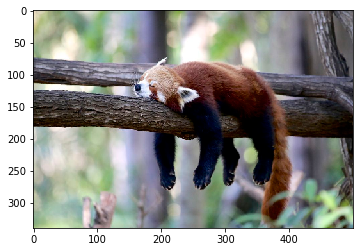

In [10]:
plt.imshow(im_arr);

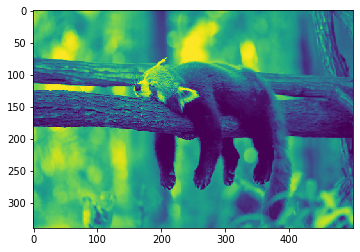

In [11]:
x = np.array([0.299, 0.587, 0.114])
def task_5_slow(im_arr):
    w,h,c = im_arr.shape
    res = []
    for line in im_arr:
        for pixcel in line:
            res.append(sum(pixcel*x))
    return np.array(res).reshape(w,h)

new_img = task_5_slow(im_arr)
plt.imshow(new_img);

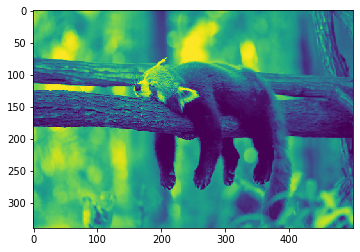

In [12]:
def task_5_fast(im_arr):
    return np.sum(im_arr * np.array([0.299, 0.587, 0.114]), axis=2)
new_img = task_5_slow(im_arr)
plt.imshow(new_img);

slow
1.54 s ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
fast
6.11 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


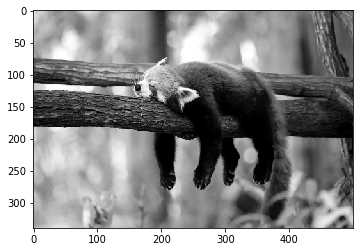

In [13]:
np.testing.assert_array_almost_equal(task_5_slow(im_arr), task_5_fast(im_arr))

print('slow')
%timeit task_5_slow(im_arr)
print('fast')
%timeit task_5_fast(im_arr)

gray_im_arr = task_5_fast(im_arr)
plt.imshow(gray_im_arr, cmap='gray')

## Task 6
Реализовать кодирование длин серий (Run-length encoding). Дан вектор `x`. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. Пример: `x = np.array([2, 2, 2, 3, 3, 3, 5])`. Ответ: `(np.array([2, 3, 5]), np.array([3, 3, 1]))`

In [52]:
def task_6(x):
    count_array = []
    numbers = []
    el = 0
    while el < len(x):
        curr = x[el]
        count = 1
        while el+1 < len(x) and x[el] == x[el+1]:
            count += 1
            el += 1
        count_array.append(curr)
        numbers.append(count)
        el +=1
    print(count_array)
    print(numbers)
    return (np.asarray(count_array), np.asarray(numbers))
x = np.array([2, 2, 2, 3, 3, 3, 5])

In [53]:
def task_6_fast(x):
    l = len(x)
    if l == 0: 
        return np.array([]), np.array([])
    else:
        y = np.array(x[1:] != x[:-1])
        i = np.append(np.where(y), l - 1)
        z = np.diff(np.append(-1, i))
        return (x[i], z)
x = np.array([2, 2, 2, 3, 3, 3, 5])


In [54]:
pos_slow, len_slow = task_6(x)
pos_fast, len_fast = task_6_fast(x)

[2, 3, 5]
[3, 3, 1]


In [55]:
print(pos_slow, len_slow)
print(pos_fast, len_fast)

[2 3 5] [3 3 1]
[2 3 5] [3 3 1]


In [57]:
x = np.array([2, 2, 2, 3, 3, 3, 5])

pos_slow, len_slow = task_6(x)
pos_fast, len_fast = task_6_fast(x)

np.testing.assert_array_equal(pos_slow, pos_fast)
np.testing.assert_array_equal(len_slow, len_fast)

print('slow')
%timeit task_6(x)
print('fast')
%timeit task_6_fast(x)

x = np.array([6,5,5,5,5,5,5,5,5,5,5, 3, 3, 5])
pos_slow, len_slow = task_6(x)
pos_fast, len_fast = task_6_fast(x)

np.testing.assert_array_equal(pos_slow, pos_fast)
np.testing.assert_array_equal(len_slow, len_fast)

print('slow')
%timeit task_6(x)
print('fast')
%timeit task_6_fast(x)

x = np.array([6,5,1,5,1,5,1,5, 3, 3, 5,0])
pos_slow, len_slow = task_6(x)
pos_fast, len_fast = task_6_fast(x)

np.testing.assert_array_equal(pos_slow, pos_fast)
np.testing.assert_array_equal(len_slow, len_fast)

print('slow')
%timeit task_6(x)
print('fast')
%timeit task_6_fast(x)

x = np.array([0,0,0,0,0,0,0,0])
pos_slow, len_slow = task_6(x)
pos_fast, len_fast = task_6_fast(x)

np.testing.assert_array_equal(pos_slow, pos_fast)
np.testing.assert_array_equal(len_slow, len_fast)

print('slow')
%timeit task_6(x)
print('fast')
%timeit task_6_fast(x)

[2, 3, 5]
[3, 3, 1]
slow
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3

[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]


[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]
[2, 3, 5]
[3, 3, 1]


KeyboardInterrupt: 